## 결측값 시각화

```python
import numpy as np
import missingno as msno
```

```python
msno.matrix(df, figsize=(13,6)) ## 결측값을 매트릭스 형태로 시각화
# msno.bar(df, figsize=(13, 6)) ## bar 형태
```

## target Distribution (+비율)

```python
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  ## 한글깨짐 방지
```

```python
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이 (데이터 개수)
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100 # target ratio
        
        ax.text(left_coord + width/2.0,
                height + total_size*0.001,
                '{:1.1f}%'.format(percent),
                ha = 'center')
   
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')
```

## 그룹별 요약통계량 분포 시각화

```python
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상품분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 월간 판매량이 10,000개를 초과하는 상품분류만 추출
group_cat_sum2 = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000].sort_values(by='item_cnt_day', ascending=False)

# 상품분류별 총 상품 판매량 막대 그래프
sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum2, order=group_cat_sum2['item_category_id'])
ax.set(title='Distribution of total item counts by item category id',
       xlabel='Data block number',
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # x축 라벨 회전
```

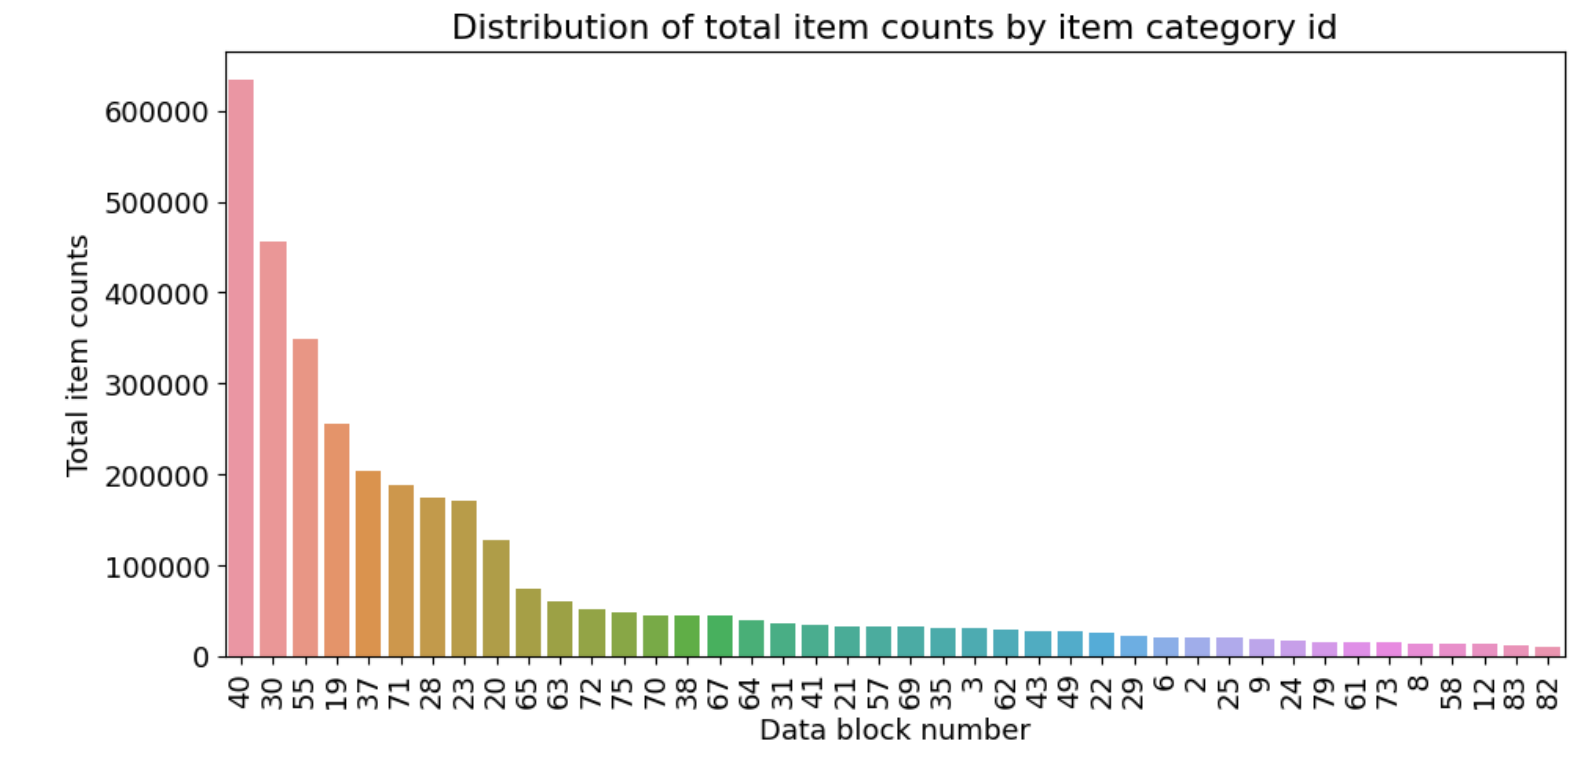